> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project:  No-show appointments data analysis.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction

### Dataset Description 

 In this project we shall be analyzing  the no-show appointments dataset with data about medical appointments and a few patient characteristics.  The columns in the dataset are patientid containing the identification of patient, appointmentid containing  the identification of each appointment, gender male or female,scheduledday the day of the actual appointment ,appointmentday the day someone scheduled an appointment, age of patient,neighborhood the location of the hospital,hipertension whether or not the patient has hypertension,diabetes whether or not a patient has diabetes has values 0 and 1 for True or false, alcoholism whether or not a patient is an alcoholic , has values 0 and ! for True or False, handcap whether a patient is handicap ,SMS received whether or not they received an SMS ,no-show whether or not the patient skipped an appointment no if the patient showed up for their appointment yes if the patient skipped the appointment, scholarship whether the patient was enrolled Brasilian welfare program.


### Question(s) for Analysis

Which gender attended scheduled sessions more?
Which gender missed scheduled sesssions more?
Did those who received sms show up for sessions more?
How many people with scholarships attended scheduled sessions vs how many without scholarships didn't attend scheduled sessions?



 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas


    100% |████████████████████████████████| 9.5MB 4.1MB/s eta 0:00:01   9% |███                             | 860kB 21.7MB/s eta 0:00:01    51% |████████████████▋               | 4.9MB 26.9MB/s eta 0:00:01    80% |█████████████████████████▊      | 7.7MB 28.3MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.6MB/s eta 0:00:01   14% |████▉                           | 2.0MB 26.3MB/s eta 0:00:01    24% |████████                        | 3.3MB 26.5MB/s eta 0:00:01    43% |██████████████                  | 5.9MB 27.4MB/s eta 0:00:01    80% |█████████████████████████▋      | 10.7MB 23.8MB/s eta 0:00:01    89% |████████████████████████████▋   | 12.0MB 27.6MB/s eta 0:00:01    99% |███████████████████████████████▉| 13.3MB 27.5MB/s eta 0:00:01
    100% |████████████████████████████████| 256kB 19.4MB/s ta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
     

<a id='wrangling'></a>
## Data Wrangling

>




In [2]:
# Load your data and print out a few lines. Perform operations to inspect data

df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()
#   types and look for instances of missing or possibly errant data.
#df.dtypes

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
#checking for missing data
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no missing values in the dataset.

In [5]:
df.nunique() #checking number of unique values in columns
#the handcap column has 5 unique values when it should have only 2 unique values 0 and 1

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The dataset contains 110527 rows,

the mean age is 37 with the maximum age being 115 most of the patients ages  range between 18 and 55 there is a -1 age which is probably a mistake,

32% of the patients received sms's ,2% of the patients are handicap ,

19% of the patients have hypertension  3% of the patients are affected by alcoholism.

In [7]:
#removing spaces in columns and replacing - with _ to have uniform headings without spaces and dashes
df.rename(columns=lambda x:x.strip().replace('-','_'),inplace=True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

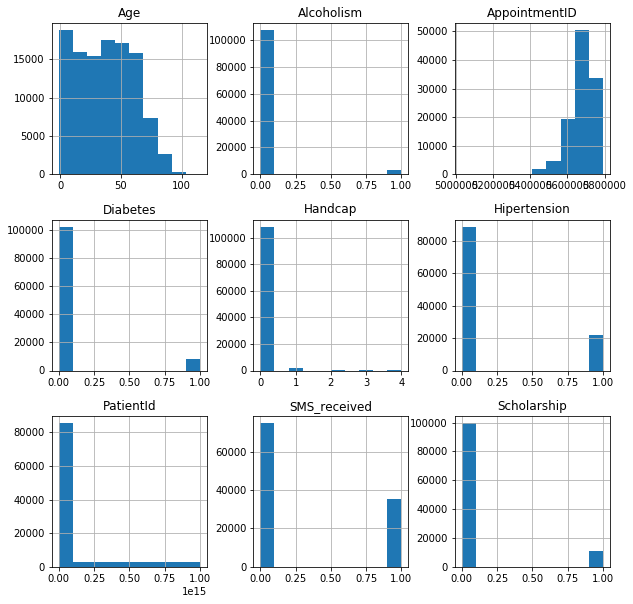

In [8]:
df.hist(figsize=(10,10));

Most of the patients are not enrolled in the scholarship

A small percentage are affected by diabetes,7%

The number of those affected by alcoholism is much less than those who are not affected.


### Data Cleaning
> Here I will make all the column names lower case, remove spaces,and replace - with _,drop columns
 

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.rename(columns=lambda x:x.strip().replace('-','_'),inplace=True)
df.columns.str.lower()

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

Making the values in  no_show  lowercase.

In [10]:
df['No_show']=df['No_show'].str.lower()
df['No_show']

0          no
1          no
2          no
3          no
4          no
5          no
6         yes
7         yes
8          no
9          no
10         no
11        yes
12         no
13         no
14         no
15         no
16         no
17        yes
18         no
19         no
20        yes
21        yes
22        yes
23         no
24         no
25         no
26         no
27         no
28         no
29         no
         ... 
110497     no
110498     no
110499     no
110500     no
110501     no
110502     no
110503     no
110504     no
110505     no
110506     no
110507     no
110508     no
110509     no
110510     no
110511     no
110512     no
110513     no
110514     no
110515    yes
110516    yes
110517     no
110518     no
110519     no
110520     no
110521     no
110522     no
110523     no
110524     no
110525     no
110526     no
Name: No_show, Length: 110527, dtype: object

In [11]:
#dropping patientid,appointmentid,scheduledday,appointmentday, handicap columns from the dataframe because I will not be investigating these columns in my analysis
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Handcap'],axis=1,inplace=True)
df.shape

(110527, 9)

In [12]:
#dropping rows with age==-1
df.drop(df.index[df['Age']==-1],inplace=True)

In [14]:



## Exploratory Data Analysis




### Which gender attended scheduled sessions more and which gender missed scheduled sessions more?

In [13]:
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'SMS_received', 'No_show'],
      dtype='object')

In [14]:
#df.loc[:,'No_show']=df.loc[:,'No_show'].apply(lambda x: 0 if x=='no' else 1)
df.groupby('Gender')['No_show'].value_counts()

Gender  No_show
F       no         57245
        yes        14594
M       no         30962
        yes         7725
Name: No_show, dtype: int64

More females showed up scheduled sessions than those females missed  scheduled sessions.

Also more males attended  scheduled sessions than those who missed scheduled sessions.

More females than males attended scheduled sessions  and more females also missed scheduled sessions than males.

In [25]:
#a function to plot bargraphs.
def my_plot(col1,col2):
   output=sns.countplot(x=df[col1],hue=df[col2])
   output.set_xlabel(col1)
   output.set_ylabel(col2  + "counts")
   output.set_title(col1 + 'vs'  + col2)
   
   return my_plot

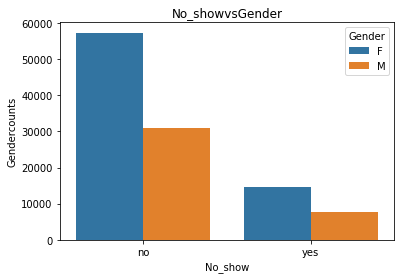

In [28]:
# calling the function my_plot and passing the No_show and Gender
attendedgender=my_plot("No_show","Gender")





From the no bargarph in the x axis , more females showed up for scheduled sessions than males. The no column stands for those who showed up for scheduled sessions.
From the yes column in the x axis, more females missed scheduled sessions than males. The yes bargraph stands for thos who missed scheduled sessions.

### Did those who did receive sms show up for sessions more ?

In [21]:
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'SMS_received', 'No_show'],
      dtype='object')

In [22]:
#df.loc[:,'no_show']=df.loc[:,'no_show'].apply(lambda x: 0 if x=='no' else 1)
df.groupby('SMS_received')['No_show'].value_counts()

SMS_received  No_show
0             no         62510
              yes        12535
1             no         25698
              yes         9784
Name: No_show, dtype: int64

25698 of those who received sms showed up for appointments while  9784 patients who received sms missed sessions, 

While 62510 patients who didn't receive sms showed up for  sessions, and 12535 of those who didn't receive sms showed up for sessions.

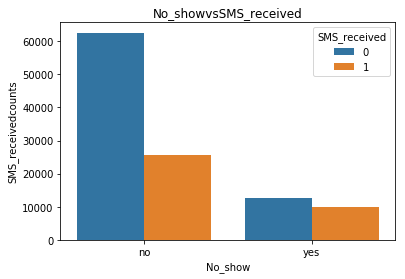

In [29]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
sms=my_plot("No_show","SMS_received")


Those who didn't received sms showed up for sessions more, than those who received sms

Those who did receive sms missed less sessions than those who didn't receive sms.

### How many people with scholarships attended scheduled sessions vs how many without scholarships didn't attend scheduled sessions?

In [26]:
df.loc[:,'No_show']=df.loc[:,'No_show'].apply(lambda x: 0 if x=='no' else 1)
df.groupby('Scholarship').mean().loc[:,'No_show']

Scholarship
0    0.198072
1    0.237363
Name: No_show, dtype: float64

People with scholarship no show rate is 23%  while those without scholarship no_show rate is 19%

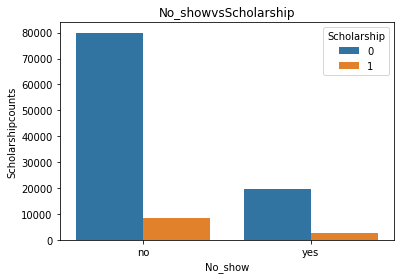

In [30]:
scholarship=my_plot("No_show","Scholarship")


A large number of those who didn't have scholarships showed up for appointments compared to those who  had scholarships,
also less than 5000 of those who had scholarships missed scheduled sessions.20,000 patients who didn't have scholarships missed scheduled sessions
 The possibility could be that the number of people awarded the scholarship is lower than those who are not awarded the scholarship
 Having a scholarship encourages people not to miss scheduled sessions.


# Which neighborhood attended scheduled sessions the most?

In [31]:
neighborhood=df.groupby('No_show')['Neighbourhood'].value_counts()[:5].unstack()
neighborhood

Neighbourhood,JARDIM CAMBURI,MARIA ORTIZ,RESISTÊNCIA,JARDIM DA PENHA,SANTA MARTHA
No_show,,,,,
no,6252,4586,3525,3246,2635


Text(0,0.5,'Neighborhood')

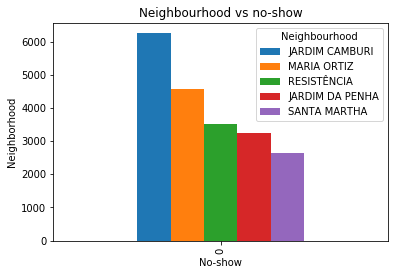

In [30]:
neighborhood.plot(kind='bar')
plt.title('Neighbourhood vs no-show')
plt.xlabel('No-show')
plt.ylabel('Neighborhood')

Jardim_camburi,maria_ortiz,resistencia,jardim_da_penha were the top five neighborhood which attended scheduled sessions.

<a id='conclusions'></a>
## Conclusions

> more females showed up for scheduled sessions than males and also more females missed scheduled sessions than males.

Those who received sms and showed up for sessions are much fewer than those who didn't receive sms and showed up.Those who received sms and missed sessions are fewer than those who didn't receive sms and missed sessions.

Receiving sms has slight effect on the patients not missing sessions. 
A large number of those who didn't have scholarships showed up for appointments compared to those who  had scholarships,

also less than 5000 of those who had scholarships missed scheduled sessions.20,000 patients who didn't have scholarships missed scheduled sessions.Having a scholarship encourages people not to miss scheduled sessions.

Jardim_camburi,maria_ortiz,resistencia,jardim_da_penha were the top five neighborhood which attended scheduled sessions.

One limitation is that the results are limited to a small sample and therefor cannot be extrapolated for a large population, some of the variables such as sms_received  maynot be the direct cause of patients showing up other factors such as distance from hospital,need to be considered for a more wholistic view.It would be nice to investigate major conditions of those who attended sessions but due to time I couldn't.



In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0